In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import itertools
import warnings

In [5]:
data = pd.read_csv("pressure_cycles.csv", index_col=0, parse_dates=['Fake_Date'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4714 entries, AL091988 to AL172017
Data columns (total 24 columns):
Name                4714 non-null object
Fake_Date           4714 non-null datetime64[ns]
Date                4714 non-null object
Time                4714 non-null int64
Event               182 non-null object
Status              4714 non-null object
Latitude            4714 non-null float64
Longitude           4714 non-null float64
Maximum.Wind        4714 non-null int64
Minimum.Pressure    4714 non-null int64
Low.Wind.NE         4714 non-null int64
Low.Wind.SE         4714 non-null int64
Low.Wind.SW         4714 non-null int64
Low.Wind.NW         4714 non-null int64
Moderate.Wind.NE    4714 non-null int64
Moderate.Wind.SE    4714 non-null int64
Moderate.Wind.SW    4714 non-null int64
Moderate.Wind.NW    4714 non-null int64
High.Wind.NE        4708 non-null float64
High.Wind.SE        4708 non-null float64
High.Wind.SW        4708 non-null float64
High.Wind.NW        4708 

In [5]:
data.head()

,Name,Fake_Date,Date,Time,Event,Status,Latitude,Longitude,Maximum.Wind,Minimum.Pressure,...,Moderate.Wind.NE,Moderate.Wind.SE,Moderate.Wind.SW,Moderate.Wind.NW,High.Wind.NE,High.Wind.SE,High.Wind.SW,High.Wind.NW,Unnamed: 23,Unnamed: 24
ID,,,,,,,,,,,,,,,,,,,,,
AL091988,HELENE,1988-09-19,9/19/1988,1800,NaN,TD,13.4,-31.6,30,1009,...,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,NaN,NaN
AL091988,HELENE,1988-09-20,9/20/1988,0,NaN,TD,13.3,-32.7,32,1008,...,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,NaN,NaN
AL091988,HELENE,1988-09-21,9/20/1988,600,NaN,TS,13.2,-33.8,35,1008,...,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,NaN,NaN
AL091988,HELENE,1988-09-22,9/20/1988,1200,NaN,TS,13.0,-34.8,40,1004,...,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,NaN,NaN
AL091988,HELENE,1988-09-23,9/20/1988,1800,NaN,TS,12.4,-35.7,45,1002,...,-999,-999,-999,-999,-999.0,-999.0,-999.0,-999.0,NaN,NaN


In [6]:
data.columns

Index(['Name', 'Fake_Date', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum.Wind', 'Minimum.Pressure', 'Low.Wind.NE',
       'Low.Wind.SE', 'Low.Wind.SW', 'Low.Wind.NW', 'Moderate.Wind.NE',
       'Moderate.Wind.SE', 'Moderate.Wind.SW', 'Moderate.Wind.NW',
       'High.Wind.NE', 'High.Wind.SE', 'High.Wind.SW', 'High.Wind.NW',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [6]:
#data.index = pd.date_range(start=datetime(data.Date1), periods=len(data), freq='D')
#data['ln_air'] = np.log(data['air'])

data = data.set_index('Fake_Date')

In [44]:
# I am using machine learning to get the best model for the new prediction target

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 0, 3, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)


In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['Minimum.Pressure'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:71848.59162896959
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:67320.02298629133
ARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:62232.68680868361
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:43208.3682093798
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:42791.94215897547
ARIMA(0, 0, 0)x(0, 1, 3, 12)12 - AIC:42643.290006366115
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:45178.10236154961
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:43165.7641114197
ARIMA(0, 0, 0)x(0, 2, 3, 12)12 - AIC:42753.693424714904
ARIMA(0, 0, 0)x(0, 3, 1, 12)12 - AIC:47738.13279976621
ARIMA(0, 0, 0)x(0, 3, 2, 12)12 - AIC:45641.81261011361
ARIMA(0, 0, 0)x(0, 3, 3, 12)12 - AIC:45348.51409293387
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:45366.67015873018
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:43727.19316819192
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:45497.222404957996
ARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:43256.80556121409
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:44850.32594268564
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:42999.50652595781
ARIMA(0, 

In [ ]:
# ARIMA(1, 1, 0)x(1, 1, 0, 12)

In [40]:
mod = sm.tsa.statespace.SARIMAX(data['Minimum.Pressure'],
                                order=(1, 1, 3),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                   Minimum.Pressure   No. Observations:                 4714
Model:             SARIMAX(1, 1, 3)x(1, 1, 1, 12)   Log Likelihood              -14195.293
Date:                            Mon, 05 Nov 2018   AIC                          28404.587
Time:                                    03:43:27   BIC                          28449.795
Sample:                                09-19-1988   HQIC                         28420.479
                                     - 08-15-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4466      0.089      5.022      0.000       0.272       0.621
ma.L1         -0.0111      0.089   

C:\Users\susmani\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


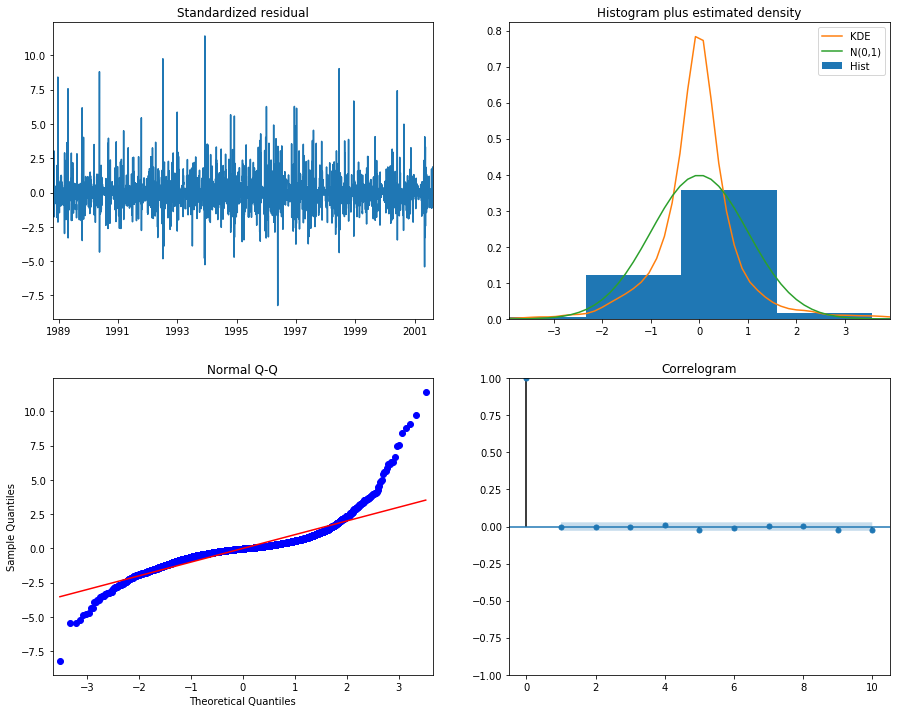

In [41]:
# run some diagnostics

results.plot_diagnostics(figsize=(15, 12))
plt.show()

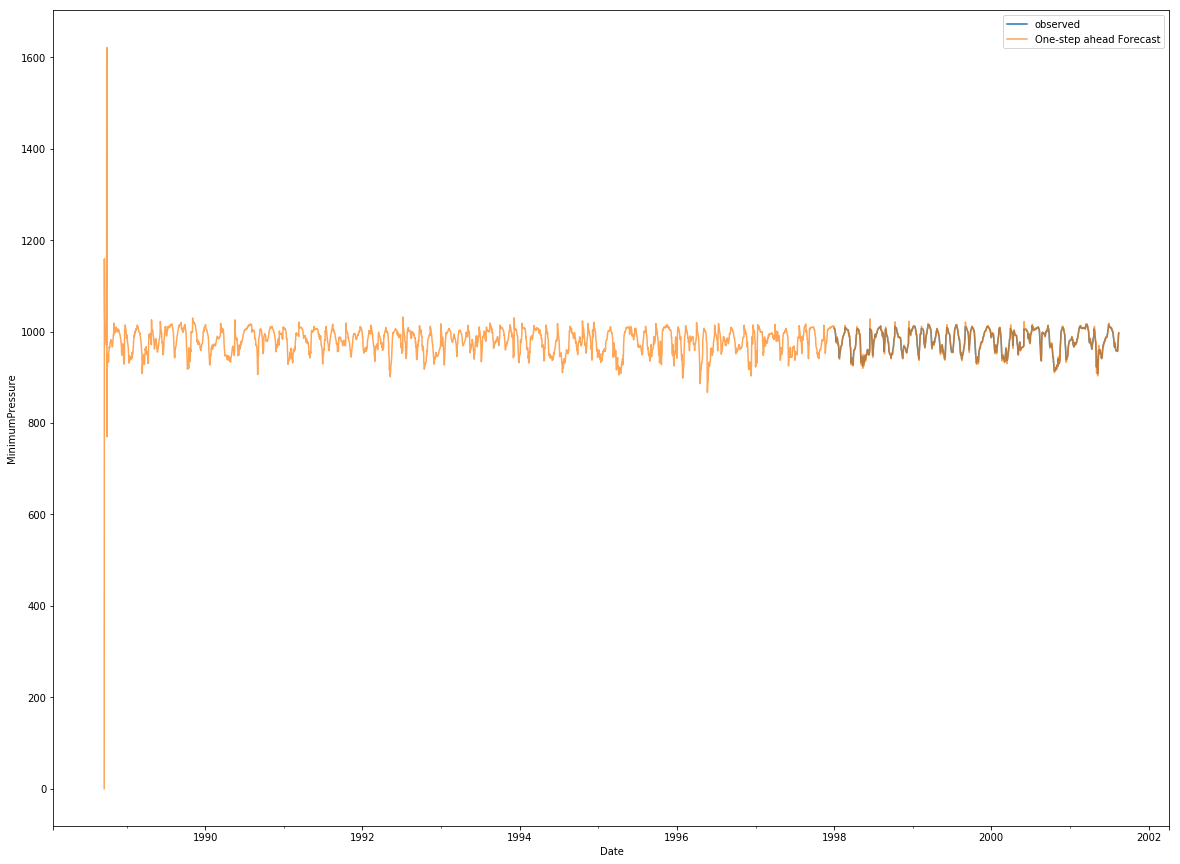

In [42]:
# and look how my model does predicting for next period	

pred = results.get_prediction(start=pd.to_datetime('1988-09-19'), dynamic=False)
pred_ci = pred.conf_int()

ax = data['Minimum.Pressure']['1998':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')
plt.legend()

plt.show()

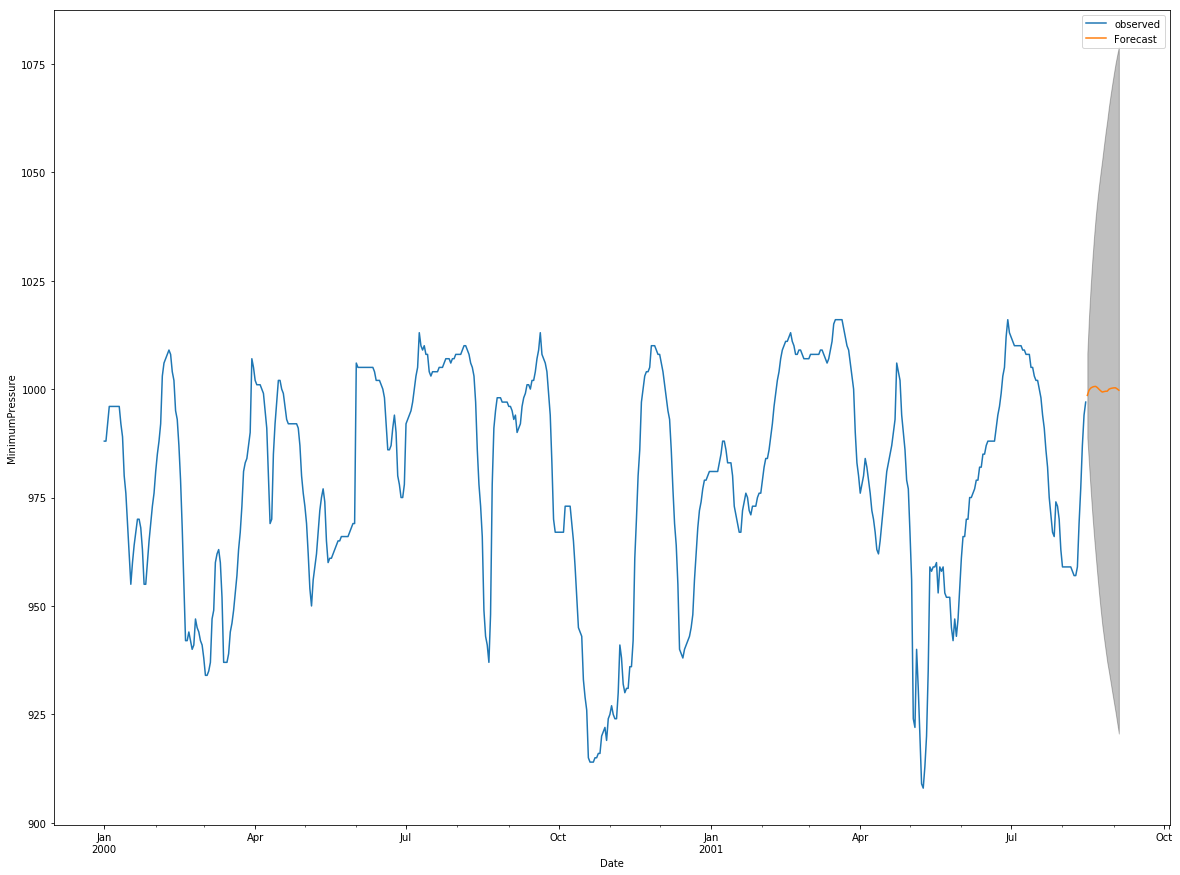

In [43]:
# and for 20 periods into future

# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = data['Minimum.Pressure']['2000':].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')

plt.legend()
plt.show()

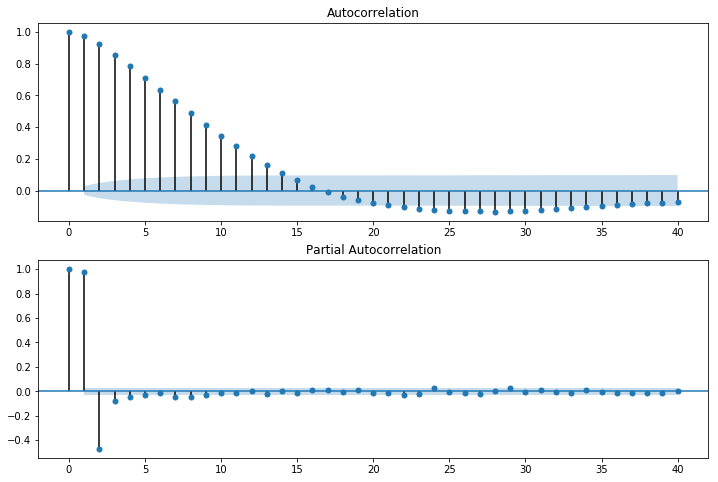

In [39]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Minimum.Pressure'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Minimum.Pressure'], lags=40, ax=ax2)
plt.show()

In [30]:
data_Katrina = pd.read_csv("hurricane2005_Katrina.csv", index_col=0, parse_dates=['Date1'])

In [33]:
data_Katrina = data_Katrina.set_index('Date1')

In [34]:
mod_Katrina = sm.tsa.statespace.SARIMAX(data_Katrina['MinimumPressure'],
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_Katrina = mod_Katrina.fit()

print(results_Katrina.summary())

                                 Statespace Model Results                                 
Dep. Variable:                    MinimumPressure   No. Observations:                   34
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -26.670
Date:                            Sun, 04 Nov 2018   AIC                             59.339
Time:                                    15:52:57   BIC                             59.577
Sample:                                06-01-2005   HQIC                            57.732
                                     - 07-04-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8807      0.315      2.800      0.005       0.264       1.497
ar.S.L12      -0.7764      0.482   

ValueError: operands could not be broadcast together with shapes (9,) (6,) (9,) 

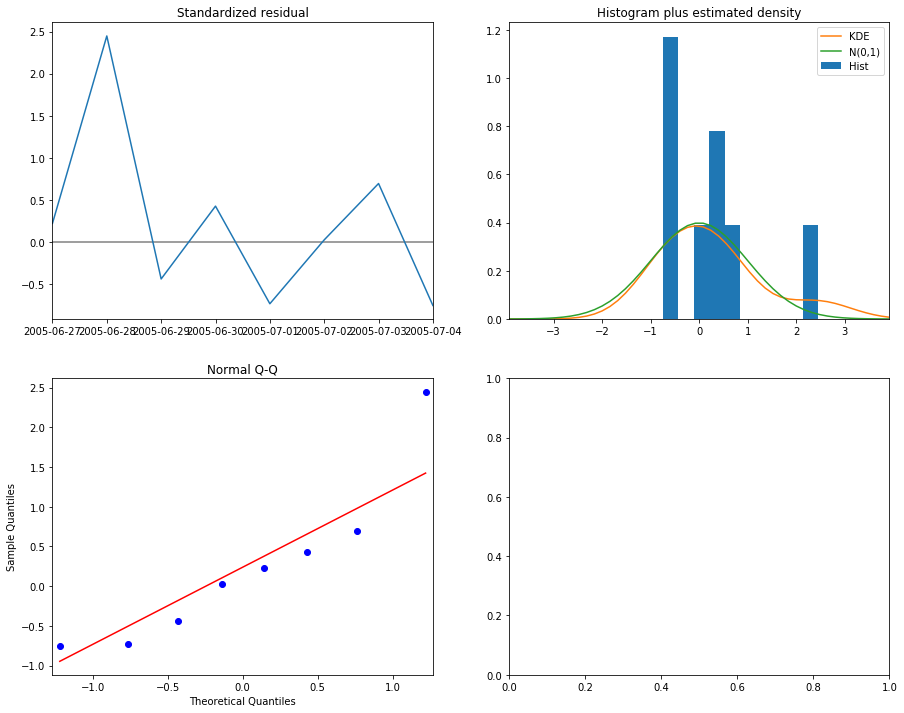

In [35]:
results_Katrina.plot_diagnostics(figsize=(15, 12))
plt.show()

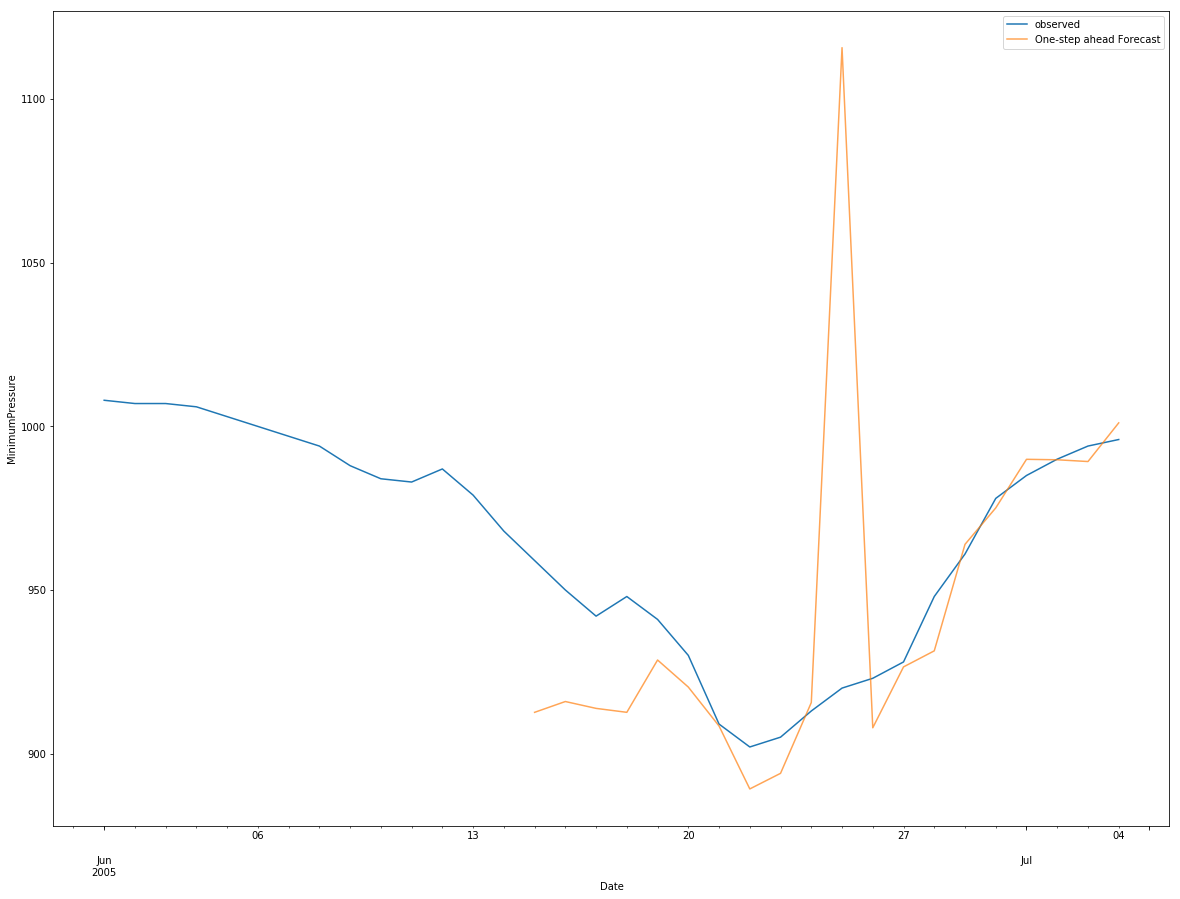

In [36]:
# and look how my model does predicting for next period	

pred_Katrina = results_Katrina.get_prediction(start=pd.to_datetime('2005-06-15'), dynamic=False)
pred_ci_Katrina = pred.conf_int()

ax = data_Katrina['MinimumPressure']['2005':].plot(label='observed', figsize=(20, 15))
pred_Katrina.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

#ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')
plt.legend()

plt.show()

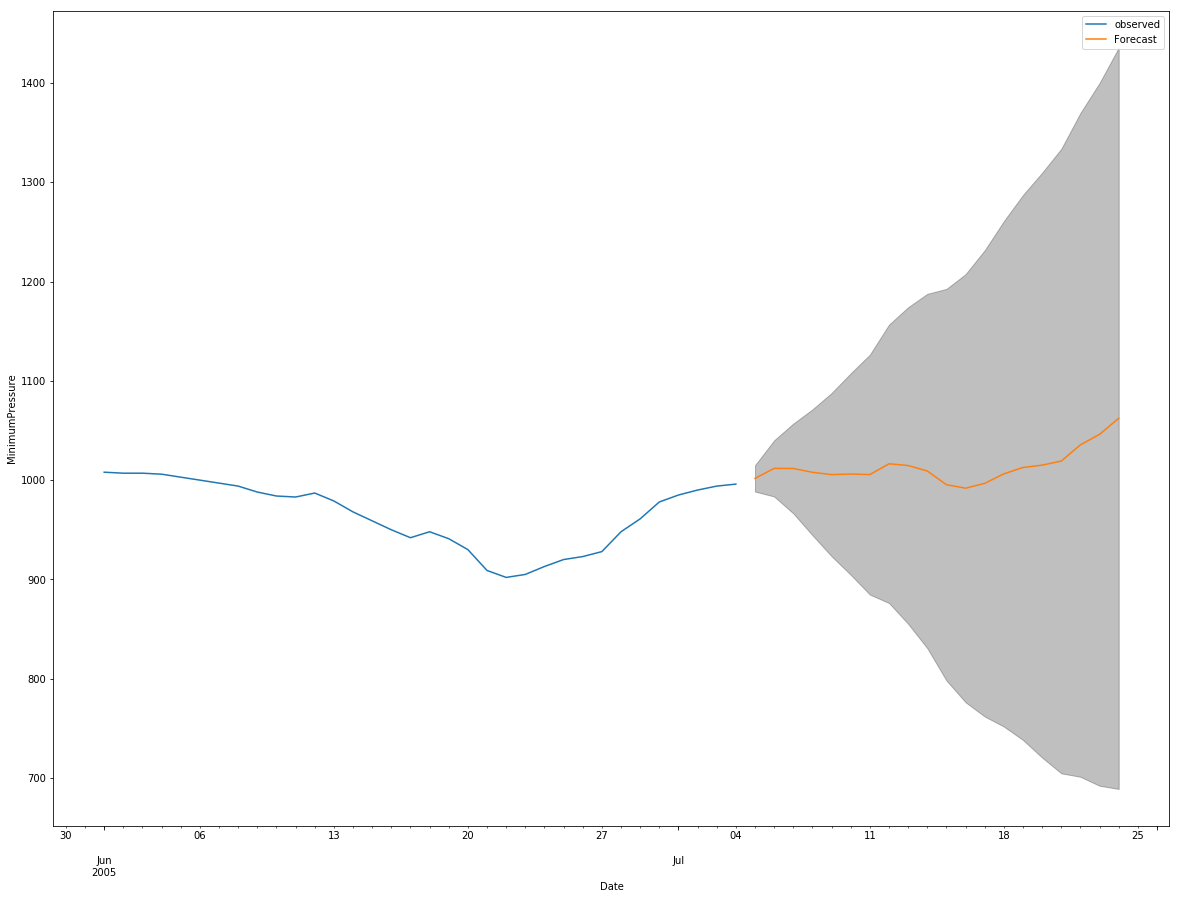

In [39]:
# and for 20 periods into future

# Get forecast 20 steps ahead in future
pred_uc_Katrina = results_Katrina.get_forecast(steps=20)

# Get confidence intervals of forecasts
pred_ci_Katrina = pred_uc_Katrina.conf_int()

ax = data_Katrina['MinimumPressure'].plot(label='observed', figsize=(20, 15))
pred_uc_Katrina.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci_Katrina.index,
                pred_ci_Katrina.iloc[:, 0],
                pred_ci_Katrina.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')

plt.legend()
plt.show()

In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

C:\Users\susmani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\susmani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\susmani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


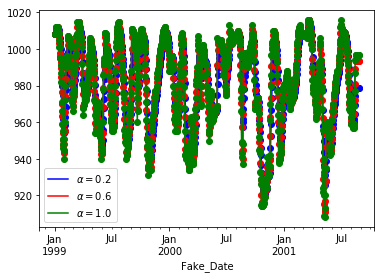

In [8]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(data['Minimum.Pressure']['1999':]).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(data['Minimum.Pressure']['1999':]).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(data['Minimum.Pressure']['1999':]).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

C:\Users\susmani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\susmani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


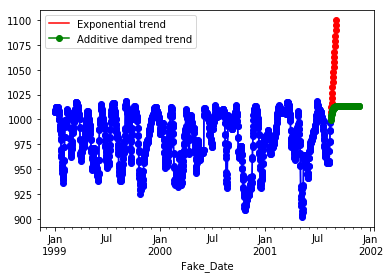

In [18]:
fit2 = Holt(data['Minimum.Pressure']['1999':], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(20).rename("Exponential trend")

fit2.fittedvalues.plot(marker="o", color='blue')
fcast2.plot(color='red', marker="o", legend=True)

fit3 = Holt(data['Minimum.Pressure']['1999':], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(100).rename("Additive damped trend")

fit3.fittedvalues.plot(marker="o", color='blue')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

C:\Users\susmani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\susmani\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\susmani\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


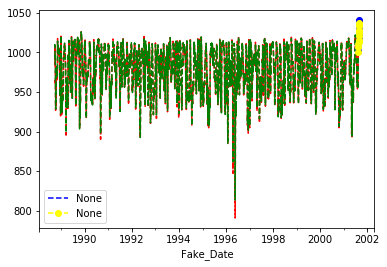

In [21]:
fit1 = ExponentialSmoothing(data['Minimum.Pressure']['2000':], seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(data['Minimum.Pressure']['2000', seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
#fit3 = ExponentialSmoothing(data['Minimum.Pressure']['1999':], seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
#fit4 = ExponentialSmoothing(data['Minimum.Pressure']['1999':], seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red')
fit2.fittedvalues.plot(style='--', color='green')

fit1.forecast(12).plot(style='--', marker='o', color='blue', legend=True)
fit2.forecast(12).plot(style='--', marker='o', color='yellow', legend=True)

plt.show()